# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [2]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [3]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [4]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
    plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Загрузка данных 

In [5]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')
# data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

## Двухвальная установка без регенератора

### Загрузка данных

In [6]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

### Построим общие характеристики установки

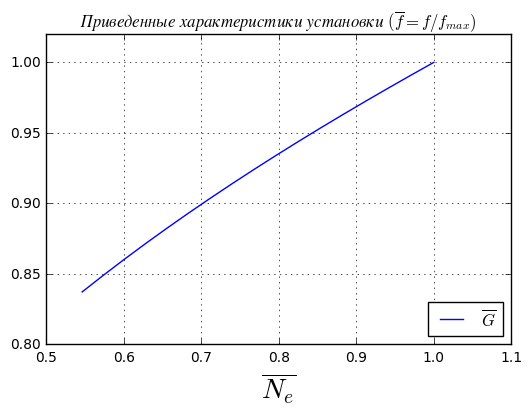

In [7]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

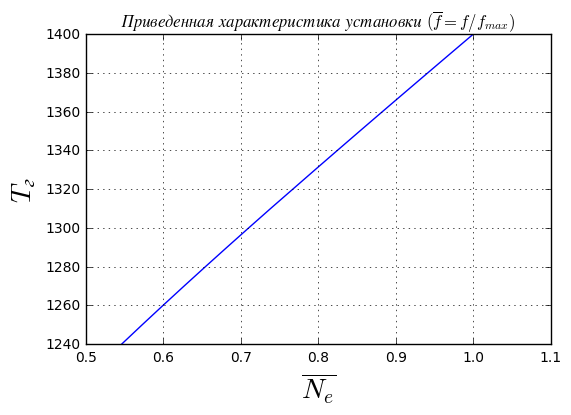

In [8]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [9]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

### Построим общие характеристики установки

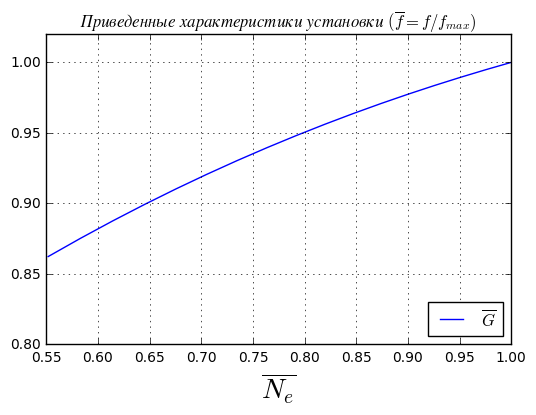

In [10]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

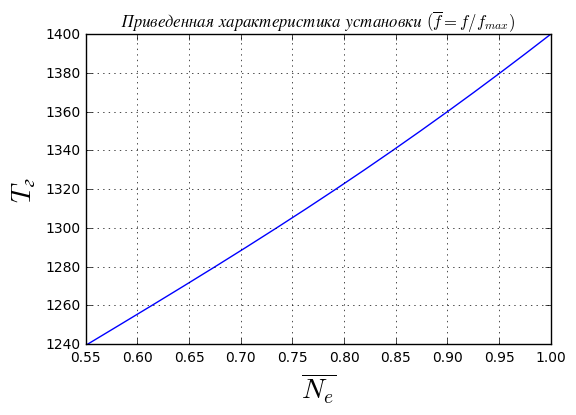

In [11]:
plot_characteristic(data_2nr.power, data_2n.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

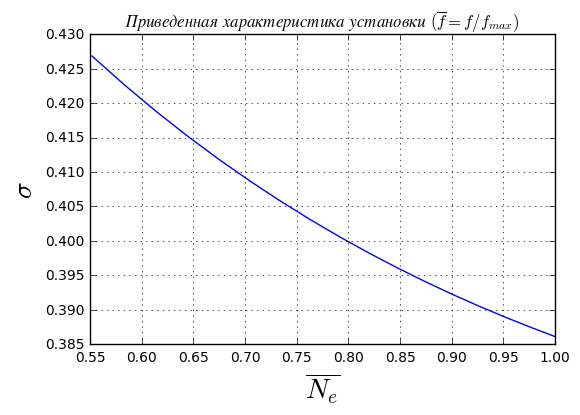

In [12]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [13]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

### Построим общие характеристики установки

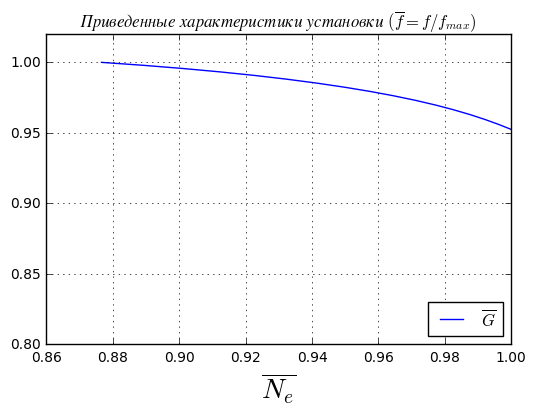

In [14]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

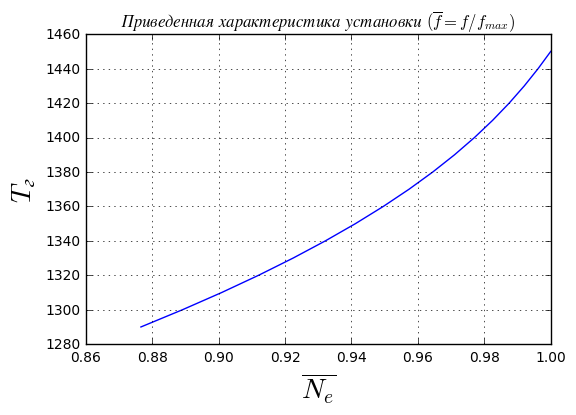

In [15]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

In [16]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
16,NaN,0.999467,0.968270,44.416178,5.271397,1.936827,2.167300,6.730147,2083.007702,8934.122138,0.426846,1290
15,NaN,0.999516,0.971030,45.080877,5.372168,1.967765,2.174005,7.110191,2121.691062,8987.151305,0.422684,1300
14,NaN,0.999558,0.973558,45.714302,5.469800,1.997892,2.180136,7.488572,2158.871891,9037.133923,0.418791,1310
13,NaN,0.999594,0.975867,46.315058,5.564075,2.027134,2.185720,7.863645,2194.524445,9084.059826,0.415162,1320
12,NaN,0.999625,0.977973,46.883391,5.654970,2.055475,2.190797,8.234457,2228.687461,9128.037010,0.411785,1330
11,NaN,0.999652,0.979890,47.419448,5.742453,2.082894,2.195403,8.600054,2261.393475,9169.156291,0.408648,1340
10,NaN,0.999675,0.981633,47.923814,5.826543,2.109387,2.199575,8.959714,2292.689272,9207.532888,0.405738,1350
9,NaN,0.999695,0.983218,48.397249,5.907285,2.134955,2.203349,9.312844,2322.625443,9243.286462,0.403045,1360
8,NaN,0.999712,0.984656,48.840649,5.984739,2.159607,2.206757,9.658978,2351.255906,9276.539066,0.400553,1370
7,NaN,0.999727,0.985963,49.255839,6.059089,2.183388,2.209838,9.998186,2378.670460,9307.473461,0.398246,1380
